In [43]:
import tensorflow as tf
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import csv
import sys

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [81]:
df = pd.read_csv("dataVlada.csv")
df.index = df['Date']
df.index = [datetime.datetime.strptime(x, '%d.%m.%Y') for x in df.index]
df.head(20)

,Unnamed: 0,Date,Infected,Fatal,Cured
2020-03-21,0,21.03.2020,9,0,0
2020-03-22,1,22.03.2020,29,1,0
2020-03-23,2,23.03.2020,22,0,0
2020-03-24,3,24.03.2020,12,2,0
2020-03-25,4,25.03.2020,29,1,0
2020-03-26,5,26.03.2020,24,3,3
2020-03-27,6,27.03.2020,18,3,3
2020-03-29,7,29.03.2020,18,2,0
2020-03-30,8,30.03.2020,26,1,9
2020-03-31,9,31.03.2020,44,2,0


In [82]:
df = df.drop(['Date'], axis=1)
df = df.drop(['Unnamed: 0'], axis = 1)

In [83]:
r = pd.date_range(start=df.index.min(), end=df.index.max())
print(r)
df = df.reindex(r).fillna(method='ffill').reset_index()
df.head(20)

DatetimeIndex(['2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
               '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
               '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
               '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
               '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13',
               '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
               '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
               '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
               '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29',
               '2020-04-30', '2020-05-01', '2020-05-02', '2020-05-03',
               '2020-05-04', '2020-05-05', '2020-05-06', '2020-05-07',
               '2020-05-08', '2020-05-09', '2020-05-10', '2020-05-11',
               '2020-05-12', '2020-05-13'],
              dtype='datetime64[n

,index,Infected,Fatal,Cured
0,2020-03-21,9.0,0.0,0.0
1,2020-03-22,29.0,1.0,0.0
2,2020-03-23,22.0,0.0,0.0
3,2020-03-24,12.0,2.0,0.0
4,2020-03-25,29.0,1.0,0.0
5,2020-03-26,24.0,3.0,3.0
6,2020-03-27,18.0,3.0,3.0
7,2020-03-28,18.0,3.0,3.0
8,2020-03-29,18.0,2.0,0.0
9,2020-03-30,26.0,1.0,9.0


In [84]:
features_considered = ['Infected', 'Fatal', 'Cured']

In [88]:
features = df[features_considered]
features.index = df['index']
features.head()

,Infected,Fatal,Cured
index,,,
2020-03-21,9.0,0.0,0.0
2020-03-22,29.0,1.0,0.0
2020-03-23,22.0,0.0,0.0
2020-03-24,12.0,2.0,0.0
2020-03-25,29.0,1.0,0.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C1BB1BE1C8>,
      dtype=object)

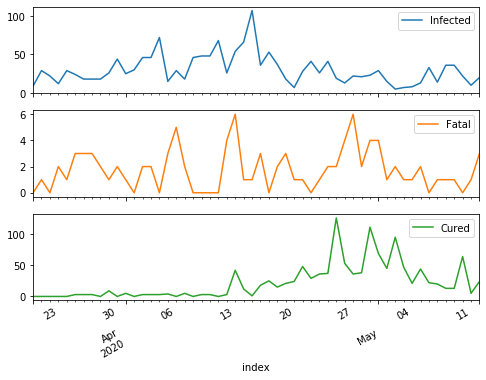

In [89]:
features.plot(subplots=True)

In [90]:
len(features.values)

54

In [93]:
features

,Infected,Fatal,Cured
index,,,
2020-03-21,9.0,0.0,0.0
2020-03-22,29.0,1.0,0.0
2020-03-23,22.0,0.0,0.0
2020-03-24,12.0,2.0,0.0
2020-03-25,29.0,1.0,0.0
2020-03-26,24.0,3.0,3.0
2020-03-27,18.0,3.0,3.0
2020-03-28,18.0,3.0,3.0
2020-03-29,18.0,2.0,0.0


In [92]:
features.to_csv('processed_data.csv')

In [94]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [95]:
pjme = pd.read_csv('processed_data.csv', index_col=[0], parse_dates=[0])

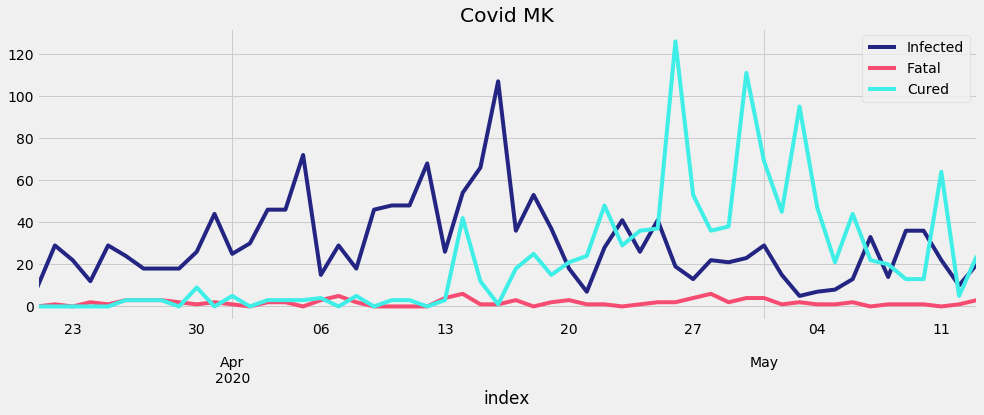

In [96]:
color_pal = ["#242582", "#f64c71", "#3feee7"]
_ = pjme.plot(style='-', figsize=(15,5), color=color_pal, title='Covid MK')